                    Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
  

####                                                                                                 Отчет по лабораторной работе "Задача Коши"
                                              
                                                 Вариант 2
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                               Выполнила: Зибаова Александра, 430 гр.
                                                                               Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.

###  Содержание
1. Постановка задачи
2. Цели работы
3. Описание используемых алгоритмов
4. Исходный код программы
5. Результаты работы программы
6. Анализ результатов 

###   1. Постановка задачи.
1. Решить с помощью неявной схемы Роте с коэффициентами $\alpha=\frac{1}{3}$, $\beta=\frac{2}{3}$ задачу Коши с относительной точностью 0,01
$$y''-y'-y=sinx$$
$$y(0)=0,\; y(1)=0$$
$$x\in[0,2]$$


2. Обеспечить работу программы с системой дифференциальных уравнений в режиме "черного ящика"

3. Найти точное решение, сравнить найденное решение с точным

4. Найти решение с помощью метода Рунге-Кутты кратности 4-5


###   3. Описание используемых алгоритмов
Для поиска решения задачи Коши дифференциальное уравнение необходимо свести к системе уравнений вида
где $y(x)\equiv (y_1(x),y_2(x),\dots,y_s(x)),\;y^0$ - заданный начальный вектор.
В ходе решения ищется последовательность векторов $\lbrace{y_n}\rbrace_{n=0}^N$, которые являются приближенными для значений решения $\lbrace{y(x_n)}\rbrace_{n=0}^N$ на множестве точек сетки $\omega\equiv\lbrace{x_i:\; x_{i+1}=x_i+h_i,\;i=\overline{0,N-1},\;x_0=a,x_N=b}\rbrace$, где $h_i>0$ - шаг сетки (в этой работе рассматривалась сетка с постоянным шагом $h_i\equiv h$)$$\\$$
Поставленная задача эквивалентна решению интегрального уравнения $$y(x)=y^0+\int_{0}^{x} f(x,y(x))dx\\$$
#### 3.1 Поиск решения дифференциального уравнения с помощью схемы Роте
Bнтеграла вычисляется по квадратурной формуле трапеций с весами
$$y_{i+1}=y_i+h(\alpha f(x_i,y_i)+(1-\alpha)f(x_{i+1},y_{i+1}))$$
$$y_0=y(0),\;i=\overline{0,N-1},\;\alpha\in[0,1]$$
#### 3.2 Поиск решения дифференциального уравнения с помощью метода Рунге-Кутты
Зная решение в точке $x_i$, можно построить решение в точке  $x_{i+1}$ с помощью разложения в ряд Тейлора.
$$y(x_{i+1})=y(x_i)+y'(x_i)+\frac{h}{2}y''(x_i)+\dots$$
Тогда, если вычисление ряда оборвать на р-ом члене и заменить точное значение $y(x_i)$ на приближенное $y_i$, то получится алгоритм
$$y_{i+1}=y_i+h\varphi(x_i,y_i,h),\; i=\overline{0,N-1}$$
$$\varphi(x_i,y_i,h)=f(t,y)+\frac{h}{2}f'(t,y)+\dots+\frac{h^{p-1}}{(p-1)!}f^{(p-1)}(t,y)$$
Строя разное количество слагаемых ряда Тейлора, можно получить m-кратный метод Рунге-Кутты. В них
$$\varphi(x_i,y_i,h)=\sum_{r=1}^m c_r k_r,$$ где $с_r$ подбираются, чтоб $\varphi(x_i,y_i,h)$ была наиболее близка к ряду Тейлора, и
$$k_1=f(x,y)$$
$$k_r=f(t+ha_r,y+\sum_{s=1}^{r-1}b_{rs}k_s)$$
В  частности, для четурехкратного метода Рунге-Кутты:
$$k_1=f(x_i,y_i)$$
$$k_2=f(x_i+\frac{h}{2}),y_i+\frac{1}{2}hk_1$$
$$k_3=f(x_i+\frac{h}{2}),y_i+\frac{1}{2}hk_2$$
$$k_4=f(x_i+h),y_i+hk_3$$



###   4. Исходный код программы

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy.linalg as lin
%matplotlib inline 

####   4. 1 Задание системы, к которой предварительно сведено уравнение

In [2]:
def F(Y,x):
    F0=np.zeros((2))
    def f1(Y,x):
        return Y[1]
    def f2(Y,x):
        return math.sin(x)+Y[0]-Y[1]
    F0[0]=f1(Y,x)
    F0[1]=f2(Y,x)
    return F0
Fn=np.zeros((2))
Fn[0]=0; Fn[1]=0
Eps=10**(-2)

####   4. 2 Точное решение системы

In [3]:
def ftochn(x):
    return -0.1236*math.exp(-1.618*x)+0.3236*math.exp((-1+5**0.5)*x/2)-0.4*math.sin(x)-0.2*math.cos(x)
def fproizv(x):
    return 0.2*math.exp(-1.618*x)+0.2*math.exp((-1+5**0.5)*x/2)-0.4*math.cos(x)+0.2*math.sin(x)

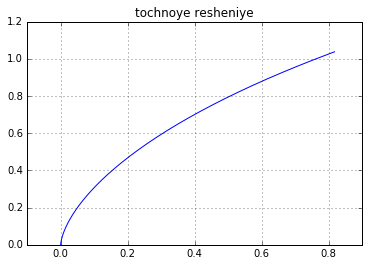

In [4]:
xpodst = np.arange(0, 2, 0.01)
ffunk=[ftochn(l) for l in xpodst]
fpr=[fproizv(l) for l in xpodst]
plt.plot(ffunk,fpr)
plt.title('tochnoye resheniye')
plt.grid()
plt.show()

####   4. 3 Реализация схемы Роте

In [5]:
aint=0; bint=2

def Rote(nint):
    Xresh=[]
    Yresh=np.zeros((nint+1,2))
    a0=aint; t000=0
    for i in range (0,nint+1):
        xi=aint+i*(bint-aint)/nint
        if i==0:
            ui=Fn
            Yresh[i,0]=ui[0]
            Yresh[i,1]=ui[1]
        else:
            def yravn1(uil):
                return uil-(ui+(bint-aint)/nint*((1/3)*F(ui,aint+(i-1)*(bint-aint)/nint)+(2/3)*F(uil,xi)))
            a=ui-0.7; b=ui+0.7; eps=0.0001; e=(a+b)/2    
            StepH=0; a=ui-100; b=ui+100; eps=0.001
            r1=a
            r2=b
            while lin.norm(r2-r1)>=eps:
                r2=r1
                r1=r2-(yravn1(r2)/(yravn1(b)-yravn1(r2)))*(b-r2)
                StepH+=1    
            ui=r2
            Yresh[i,0]=ui[0]
            Yresh[i,1]=ui[1]
        Xresh.append(xi)
    return Yresh

####   4. 3 "Черный ящик" для схемы Роте

In [10]:
def Rote_Black(F,Fn,Eps,aint,bint):
    def RoteS(F,Fn,nint,aint,bint):
        Xresh=[]
        Yresh=np.zeros((nint+1,len(Fn)))
        a0=aint; t000=0
        for i in range (0,nint+1):
            xi=aint+i*(bint-aint)/nint
            if i==0:
                ui=Fn
                for k in range (0,len(Fn)):
                    Yresh[i,k]=ui[k]
            else:
                def yravn1(uil):
                    return uil-(ui+(bint-aint)/nint*((1/3)*F(ui,aint+(i-1)*(bint-aint)/nint)+(2/3)*F(uil,xi)))
                a=ui-(bint-aint)/nint; b=ui+(bint-aint)/nint; eps=0.00001; e=(a+b)/2    
                StepH=0;
                r1=a
                r2=b
                while lin.norm(r2-r1)>=eps:
                    r2=r1
                    r1=r2-(yravn1(r2)/(yravn1(b)-yravn1(r2)))*(b-r2)
                    StepH+=1    
                ui=r2
                for k in range (0,len(Fn)):
                    Yresh[i,k]=ui[k]
            Xresh.append(xi)
        return Yresh
    nrk=20
    L=abs(lin.norm(RoteS(F,Fn,nrk-1,aint,bint))-lin.norm(RoteS(F,Fn,nrk,aint,bint)))
    while L>=Eps:
        nrk=nrk*2
        L=abs(lin.norm(RoteS(F,Fn,nrk-1,aint,bint))-lin.norm(RoteS(F,Fn,nrk,aint,bint)))
    return RoteS(F,Fn,nrk,aint,bint)
  


####   4. 5 Реализация метода Рунге-Кутты

In [7]:
#Метод Рунге-Кутты#
def RK(F,Fn,nint,aint,bint):
        Xresh=[]
        Yresh=np.zeros((nint+1,2))
        a0=aint; t000=0
        for i in range (0,nint+1):
            xi=aint+i*(bint-aint)/nint
            Xresh.append(xi)
            if i==0:
                ui=Fn
                Yresh[i,0]=ui[0]
                Yresh[i,1]=ui[1]
            else:
                k1=F(ui,xi)
                k2=F(ui+(bint-aint)*k1/2/nint,xi+(bint-aint)/2/nint)
                k3=F(ui+(bint-aint)*k2/2/nint,xi+(bint-aint)/2/nint)
                k4=F(ui+(bint-aint)*k3/nint,xi+(bint-aint)/nint)            
                ui1=ui+(bint-aint)/6/nint*(k1+2*k2+2*k3+k4)
                Yresh[i,0]=ui1[0]
                Yresh[i,1]=ui1[1]
                ui=ui1
        return Yresh
 




####   4. 6 "Черный ящик" для метода Рунге-Кутты

In [9]:
#Черный ящик метод Рунге-Куты#
def R_K(F,Fn,Eps,aint,bint):
    def RKin(F,Fn,nint,aint,bint):
        Xresh=[]
        Yresh=np.zeros((nint+1,len(Fn)))
        a0=aint; t000=0
        for i in range (0,nint+1):
            xi=aint+i*(bint-aint)/nint
            Xresh.append(xi)
            if i==0:
                ui=Fn
                for k in range (0,len(Fn)):
                    Yresh[i,k]=ui[k]
            else:
                k1=F(ui,xi)
                k2=F(ui+(bint-aint)*k1/2/nint,xi+(bint-aint)/2/nint)
                k3=F(ui+(bint-aint)*k2/2/nint,xi+(bint-aint)/2/nint)
                k4=F(ui+(bint-aint)*k3/nint,xi+(bint-aint)/nint)            
                ui1=ui+(bint-aint)/6/nint*(k1+2*k2+2*k3+k4)
                for k in range (0,len(Fn)):
                    Yresh[i,k]=ui1[k]
                ui=ui1
        return Yresh
    nrk=20
    L=abs(lin.norm(RKin(F,Fn,nrk-1,aint,bint))-lin.norm(RKin(F,Fn,nrk,aint,bint)))
    while L>=Eps:
        nrk=nrk*2
        L=abs(lin.norm(RKin(F,Fn,nrk-1,aint,bint))-lin.norm(RKin(F,Fn,nrk,aint,bint)))
    return RKin(F,Fn,nrk,aint,bint) 


###   5. Результат работы программы
####   5. 1 Результат работы схемы Роте, сравнение с точным решением и результатом, полученным с помощью метода Рунге-Кутты

48 - дробление отрезка для схемы Роте 0.0097908189458 - относительная точность в схеме
44 - дробление отрезка для метода Рунге-Кутты 0.0097710215348 - относительная точность в методе


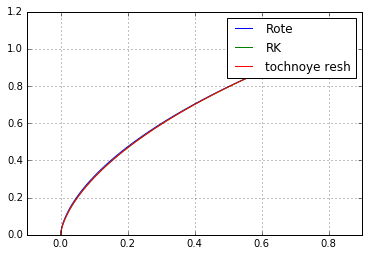

In [11]:
#для схемы Роте#
nint=2
L=abs(lin.norm(Rote(nint-1))-lin.norm(Rote(nint)))/lin.norm(Rote(nint))
while L>=Eps:
    nint=nint+2
    L=abs(lin.norm(Rote(nint-1))-lin.norm(Rote(nint)))/lin.norm(Rote(nint))
print(nint,'- дробление отрезка для схемы Роте',L,'- относительная точность в схеме') 
Y2=Rote(nint)
x2=[]; y2=[]
for i in range(0,nint):
    x2.append(Y2[i,0])
    y2.append(Y2[i,1])
#для метода Рунге-Кутты#    
nrk=2
L=abs(lin.norm(RK(F,Fn,nrk-1,0,2))-lin.norm(RK(F,Fn,nrk,0,2)))/lin.norm(RK(F,Fn,nrk,0,2))
while L>=Eps:
    nrk=nrk+2
    L=abs(lin.norm(RK(F,Fn,nrk-1,0,2))-lin.norm(RK(F,Fn,nrk,0,2)))/lin.norm(RK(F,Fn,nrk,0,2))
print(nrk,'- дробление отрезка для метода Рунге-Кутты' ,L,'- относительная точность в методе' ) 
Y1=RK(F,Fn,nrk,0,2)
x1=[]; y1=[]
for i in range(0,nrk):
    x1.append(Y1[i,0])
    y1.append(Y1[i,1])    
plt.plot(x2,y2)
plt.plot(x1,y1)
plt.plot(ffunk,fpr)
plt.grid()
plt.legend(('Rote', 'RK','tochnoye resh'))
plt.show()
 

 - сравнение значений функции с её точными значениями для такой сетки, при которой необходимая точность достигается в обоих методах


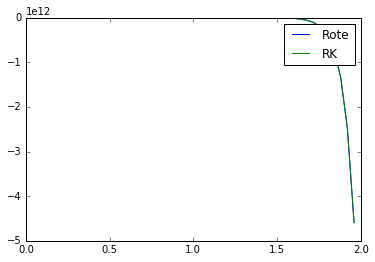

5.45215951556e+12 - разница с точным решением значений функции в методе Рунге-Кутты
5.45215951556e+12 - разница с точным решением значений функции для схемы Роте
 - сравнение значений производной функции с её точными значениями для такой сетки, при которой необходимая точность достигается в обоих методах


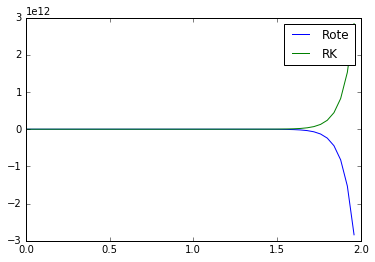

3.36969067711e+12 - разница с точным решением значений функции в методе Рунге-Кутты
3.3696906771e+12 - разница с точным решением значений функции для схемы Роте


In [12]:
Yprov1=Rote(50); Yprov2=RK(F,Fn,50,0,2)
xprov = np.arange(0, 2, 0.04)

f_Rote=[Yprov1[l,0]-ftochn(l) for l in range (0,50)]
fpr_Rote=[Yprov1[l,1]-fproizv(l) for l in range (0,50)]
f_RK=[Yprov2[l,0]-ftochn(l) for l in range (0,50)]
fpr_RK=[Yprov2[l,1]- -fproizv(l)for l in range (0,50)]
print(' - сравнение значений функции с её точными значениями для такой сетки, при которой необходимая точность достигается в обоих методах')
plt.plot(xprov,f_Rote)
plt.plot(xprov,f_RK)
plt.legend(('Rote', 'RK'))
plt.show()
print(lin.norm(f_RK),'- разница с точным решением значений функции в методе Рунге-Кутты')
print(lin.norm(f_Rote),'- разница с точным решением значений функции для схемы Роте')

print(' - сравнение значений производной функции с её точными значениями для такой сетки, при которой необходимая точность достигается в обоих методах')
plt.plot(xprov,fpr_Rote)
plt.plot(xprov,fpr_RK)
plt.legend(('Rote', 'RK'))
plt.show()
print(lin.norm(fpr_RK),'- разница с точным решением значений функции в методе Рунге-Кутты')
print(lin.norm(fpr_Rote),'- разница с точным решением значений функции для схемы Роте')

In [ ]:
plt.plot(f_tochn-f_Rote,xprov)
plt.plot(f_tochn-f_RK,xprov)

####   5.2 Проверка работы "Черных ящиков"
$\;\;\;\;\;\;$ **- Для задачи Коши из задания**

график демонстрирует совпадение решения, полученного с помощью "черных ящиков" друг с другом и с точным решением


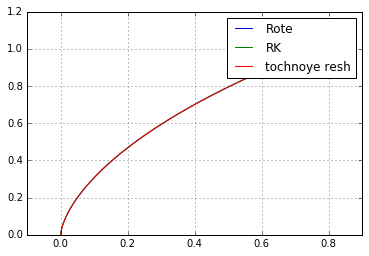

In [13]:

Y4=Rote_Black(F,Fn,0.01,0,2)
x4=[]; y4=[]
for i in range(0,len(Y4)-1):
    x4.append(Y4[i,0])
    y4.append(Y4[i,1])  
Y3=R_K(F,Fn,0.01,0,2)
x3=[]; y3=[]
for i in range(0,len(Y3)-1):
    x3.append(Y3[i,0])
    y3.append(Y3[i,1])
print('график демонстрирует совпадение решения, полученного с помощью "черных ящиков" друг с другом и с точным решением')    
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(ffunk,fpr)
plt.legend(('Rote', 'RK','tochnoye resh' ))
plt.grid()
plt.show()    


$\;\;\;\;\;\;$ **- Для произвольных задач Коши**

график демонстрирует совпадение решения, полученного с помощью "черных ящиков" друг с другом


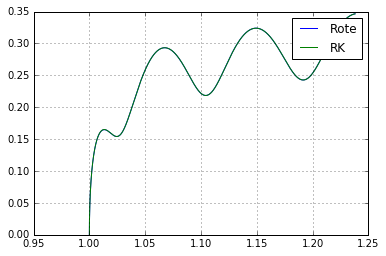

In [14]:
def F1(Y,x):
    F0=np.zeros((2))
    def f11(Y,x):
        return Y[1]
    def f21(Y,x):
        return math.cos(20*x)+2*Y[0]-8*Y[1]
    F0[0]=f11(Y,x)
    F0[1]=f21(Y,x)
    return F0
Fn1=np.zeros((2))
Fn1[0]=1; Fn1[1]=0
Eps1=10**(-2)
Y5=Rote_Black(F1,Fn1,Eps1,0,1)
x5=[]; y5=[]
for i in range(0,len(Y5)-1):
    x5.append(Y5[i,0])
    y5.append(Y5[i,1])  
Y6=R_K(F1,Fn1,Eps1,0,1)
x6=[]; y6=[]
for i in range(0,len(Y6)-1):
    x6.append(Y6[i,0])
    y6.append(Y6[i,1])
print('график демонстрирует совпадение решения, полученного с помощью "черных ящиков" друг с другом')    
plt.plot(x6,y6)
plt.plot(x5,y5)
plt.legend(('Rote', 'RK', ))
plt.grid()
plt.show()    


$\;\;\;\;\;\;$ **- Для системы уравнений 1-ого порядка**

график демонстрирует совпадение решения, полученного с помощью "черных ящиков" друг с другом


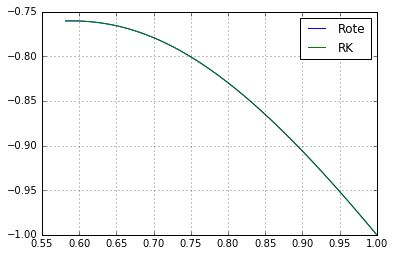

In [18]:
def F2(Y,x):
    F0=np.zeros((4))
    def f20(Y,x):
        return Y[1]
    def f21(Y,x):
        return Y[2]
    def f22(Y,x):
        return Y[3]
    def f23(Y,x):
        return x*math.exp(5*x)+x+x**2+Y[0]-Y[1]-Y[2]+Y[3]
    F0[0]=f20(Y,x); F0[1]=f21(Y,x); F0[2]=f22(Y,x); F0[3]=f23(Y,x)
    return F0
Fn2=np.zeros((4))
Fn2[0]=1; Fn2[1]=-1; Fn2[2]=1; Fn2[3]=-2
Eps2=10**(-2)
Y7=Rote_Black(F2,Fn2,Eps2,0,0.5)
x7=[]; y7=[]
for i in range(0,len(Y7)-1):
    x7.append(Y7[i,0])
    y7.append(Y7[i,1])  
Y8=R_K(F2,Fn2,Eps2,0,0.5)
x8=[]; y8=[]
for i in range(0,len(Y8)-1):
    x8.append(Y8[i,0])
    y8.append(Y8[i,1])
print('график демонстрирует совпадение решения, полученного с помощью "черных ящиков" друг с другом')    
plt.plot(x7,y7)
plt.plot(x8,y8)
plt.legend(('Rote', 'RK', ))
plt.grid()
plt.show() 

###   6. Анализ результатов
* И схема Роте, и метод Рунге-Кутты позволяют получить решение задачи Коши, совпадающее с точным решением. Но метод Рунге-Кутты (при одинаковой точности, заданной для обоих методов) приводит к решению за меньшее количество шагов. 
* Для наглядности сравнения полученных результатов с точным решением отрезок был разбит на (возможно меньшее) число частей, но так, чтоб при решении обоими методами необходимая точность для предложенной задачи была достигнута. Видно, что оба метода отличаются от точного решения на величину порядка $10^{-12}$, причем наибольшее расхождение с точным решением происходит в конце отрезка. Это вполне логично, так как при пошаговом поиске значений функций и производной ошибка накапливается и с каждым шагом становится все заметнее. 
* Видно, что метод Рунге-Кутты завышает значение производной, а метод Роте, напротив, занижает, тогда как значение функции завышают они оба. Но оба метода позволяют найти лишь приближенное решение, так что подобное расхождение допустимо и в схеме Роте объясняется ошибкой при вычислении интеграла, а в методе Рунге-Кутты - тем, что отброшены слагаемые высоких порядков в ряде Тейлора. 
* Написанные в работе "черные ящики" позволяют решать уравнения и более высоких порядков. Совпадение решений, полученных разными "черными ящиками", говорит об их корректности. 